# Visualization

In [1]:
from brian2 import *
from brian2modelfitting import *

import numpy as np

WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
 [py.warnings]


In [2]:
dt = 0.01*ms
defaultclock.dt = dt

## Load the Data

In [3]:
voltage1 = genfromtxt('voltage1nA.csv', delimiter=',')
voltage2 = genfromtxt('voltage2nA.csv', delimiter=',')

In [4]:
inp_cur1 = genfromtxt('inp_cur1nA.csv', delimiter=',')
inp_cur2 = genfromtxt('inp_cur2nA.csv', delimiter=',')
inp_current = [inp_cur1, inp_cur2]
inp_current

[array([ 0.        , -0.01416314,  0.06263459, ..., -0.44478035,
        -0.39163954, -0.33014548]),
 array([ 0.        ,  0.39594954,  0.27878635, ..., -0.55344109,
        -0.71057181, -0.62256885])]

In [5]:
out_spikes1 = genfromtxt('out_spikes1nA.csv', delimiter=',')
out_spikes2 = genfromtxt('out_spikes2nA.csv', delimiter=',')
out_spikes = [out_spikes1, out_spikes2]
# out_spikes

## Define Model

In [19]:

res={'D': 0.0011734163321673696,
 'a': 1.395984835969274,
 'tau': 0.04087378166417265,
 'R': 207866590.0330437,
 'taut': 0.08997833096837347,
 'alpha': 0.014984551918012148}


In [20]:
model = '''
        dv/dt = (R*I(t)- v)/tau :volt
        dvt/dt = (a*v - vt) / taut :volt
        alpha : volt (constant)
        a : 1 (constant)
        R : ohm (constant)
        tau : second (constant)
        taut : second (constant)
        D : second (constant)
        '''
reset = '''
        v = 0*mV
        vt = vt + alpha
        '''

In [21]:
I = TimedArray(inp_cur1*nA, dt=dt)

In [22]:
G = NeuronGroup(1, model,
                threshold='v > vt',
                reset=reset,
                refractory='D',
                method='exponential_euler')

G.set_states(res, units=False)
mon = StateMonitor(G, 'v', record=0)
spike_mon = SpikeMonitor(G)

In [23]:
run(5*second)

WARNING    "t" is an internal variable of group "neurongroup_2", but also exists in the run namespace with the value array([0.02]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v" is an internal variable of group "neurongroup_2", but also exists in the run namespace with the value array([ 0.00000000e+00,  0.00000000e+00, -7.20188724e-04, ...,
       -2.82133442e+01, -2.81915093e+01, -2.81699963e+01]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


In [24]:
fits = mon.v[0]/mV
spikes = getattr(spike_mon, 't') / ms

In [25]:
t0 = np.arange(0, len(voltage1))*dt/ms
t_ = spikes[0]
t = spikes[0][t_<2000]

In [26]:
v = fits
d = 500000

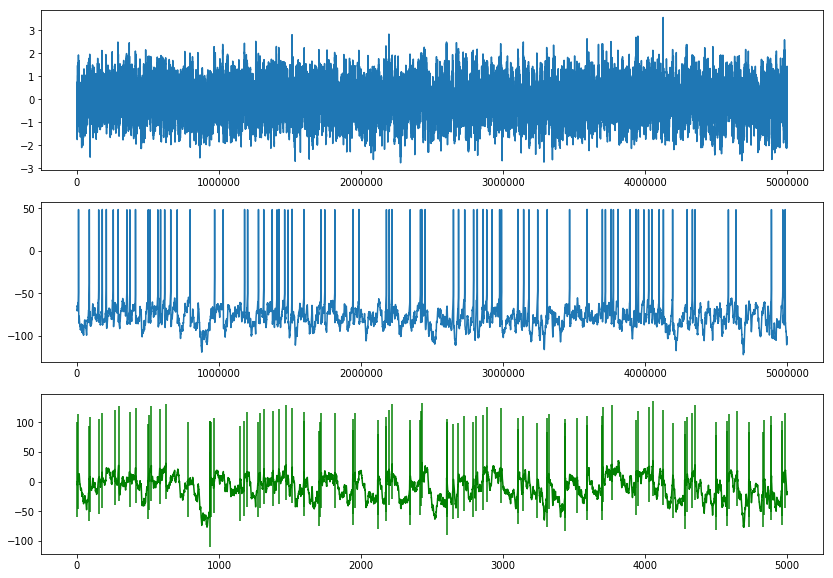

In [27]:
fig, ax = plt.subplots(nrows=3, figsize=(14,10))
ax[0].plot(t0[:d]/ms, inp_cur1[:d]);
ax[1].plot(t0[:d]/ms, voltage1[:d]);
ax[2].plot(np.arange(0, len(v))*dt/ms, v,'g');
ax[2].vlines(spikes, v[np.int_(np.round(spikes/dt*ms))]-60, v[np.int_(np.round(spikes/dt*ms))]+100, 'g');


In [28]:
len(v)

500000